### 정규성 검정

다음 데이터의 정규성을 검증하라

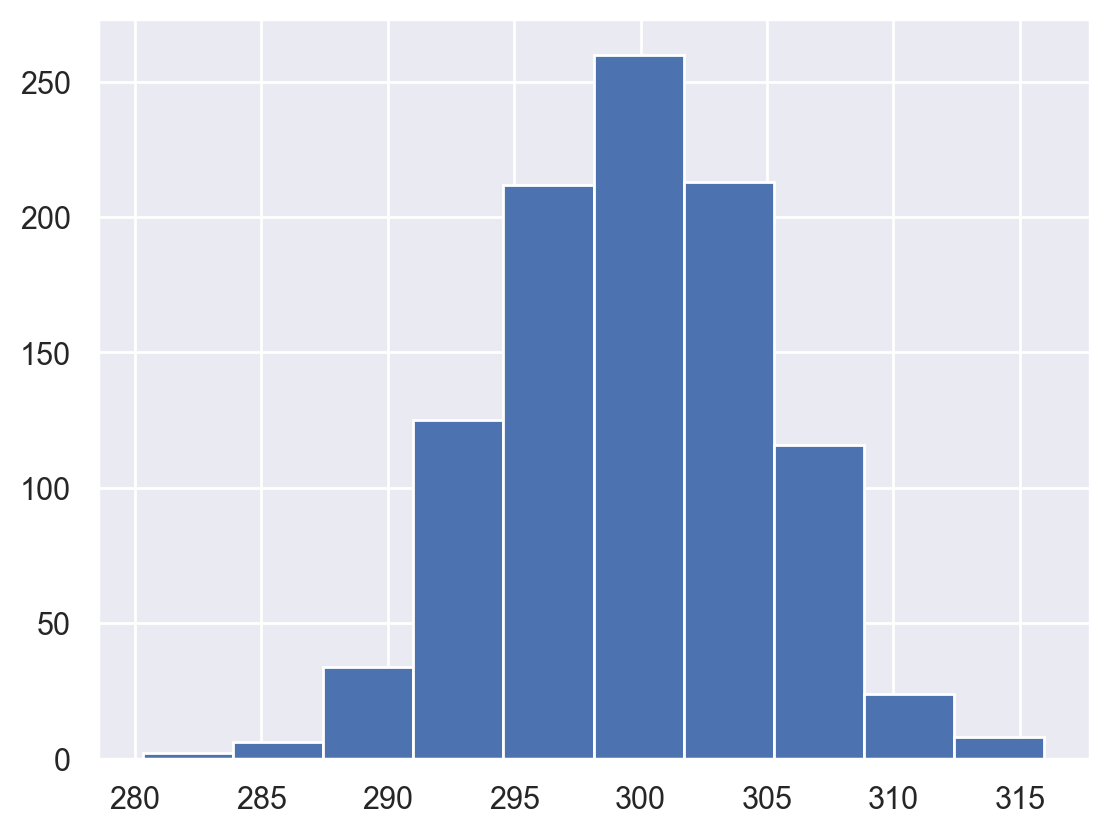

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [3]:
from scipy.stats import shapiro
print(shapiro(df))

# p-value가 0.34이므로 유의수준 5%(0.05)보다 크기때문에 귀무가설 기각X > 데이터는 정규성을 가진다.

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


다음 데이터의 정규성을 검증하라

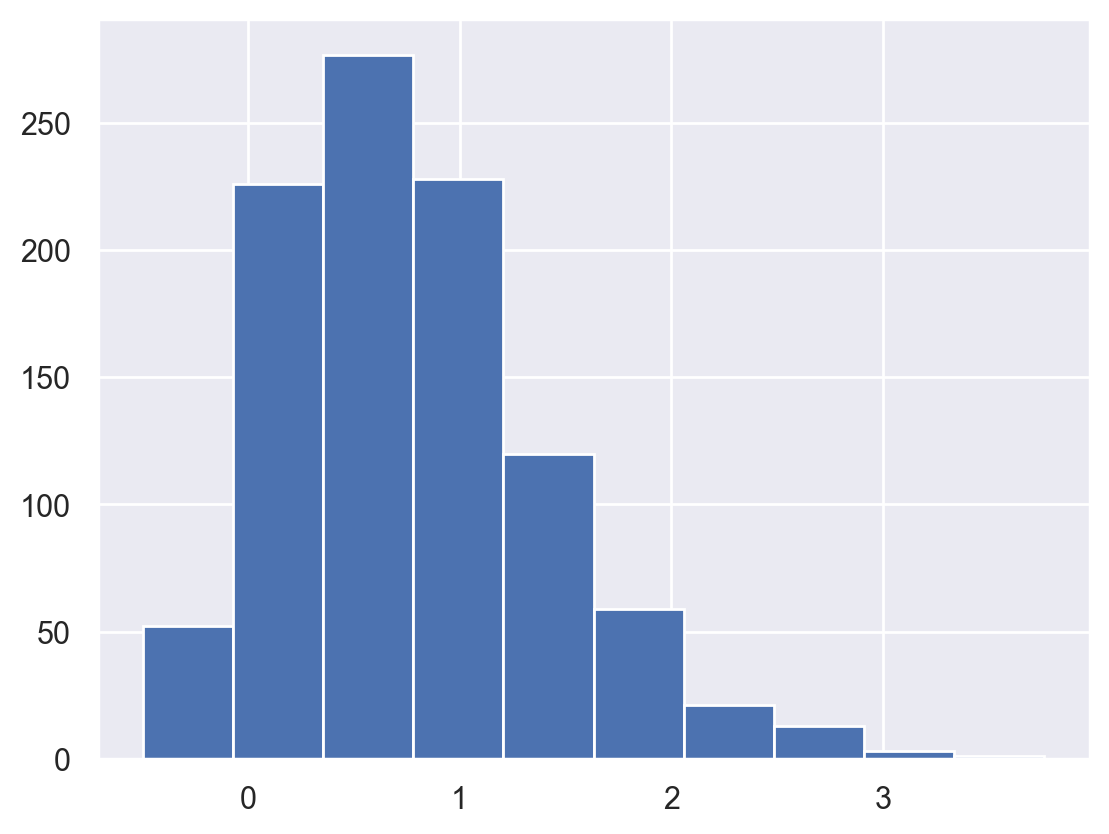

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [5]:
from scipy import stats
stats.shapiro(df)

# p-value가 2.3e-16므로 유의수준 5%(0.05)보다 작기때문에 귀무가설 기각, 대립가설 채택 > 데이터는 정규성을 가지지 않는다.

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)

위의 데이터를 log변환 한 후에 정규성을 가지는지 확인하라

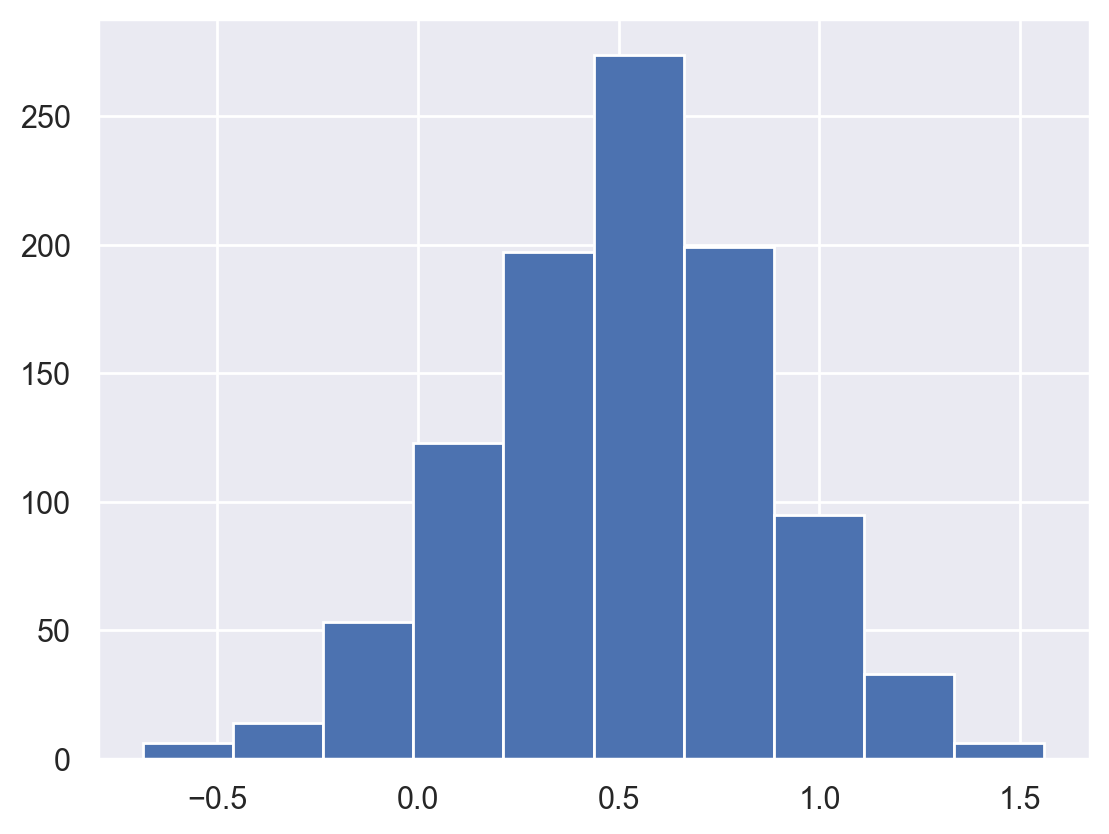

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')

log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()

In [8]:
from scipy import stats
stats.shapiro(log_y_data)

# p-value가 0.175이므로 유의수준 5%(0.05)보다 크기 때문에 귀무가설 기각 X > 데이터는 정규성을 가진다.

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)

다음 데이터의 정규성을 검증하라

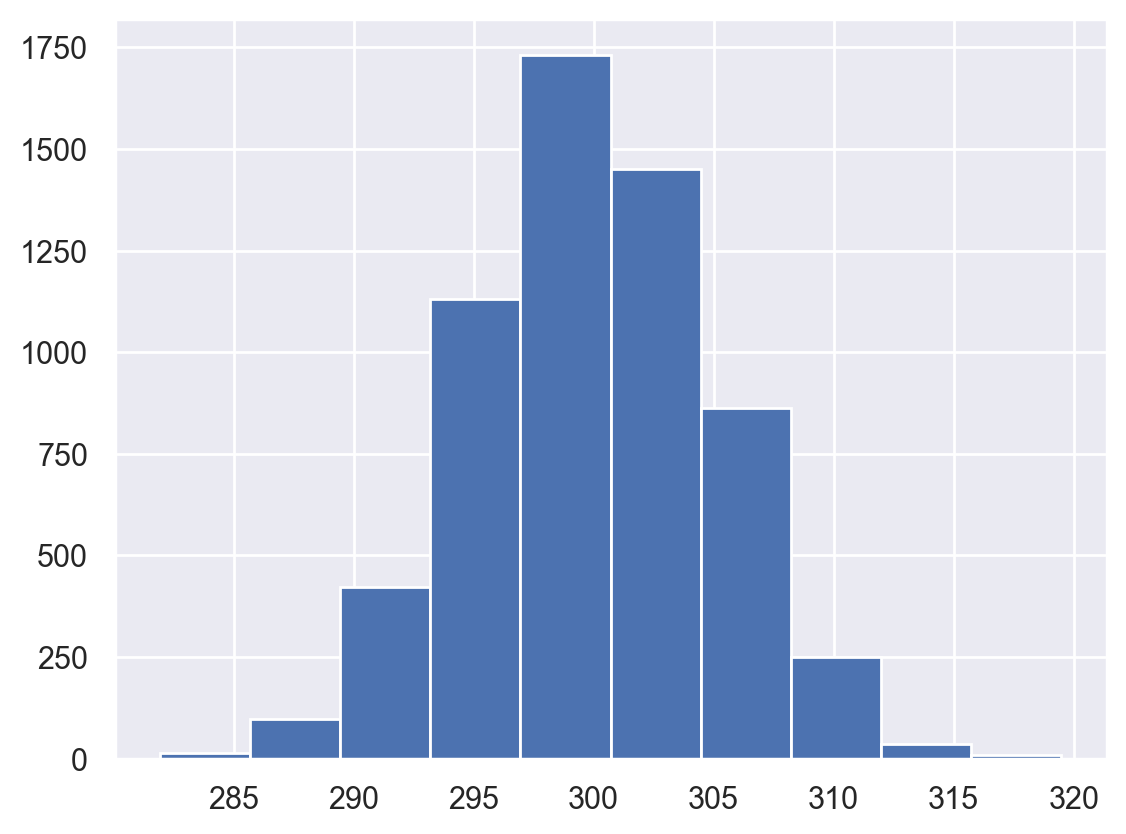

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [23]:
from scipy import stats
print(stats.shapiro(df))

# p-value가 0.15이므로 유의수준 5%(0.05)보다 크기 때문에 귀무가설 기각 X > 데이터는 정규성을 가진다.
# 샤피로 검정은 N이 5,000개가 넘는 샘플에 대해서는 정확하지 않을 수 있다. > 다른 검정방법 이용

print(stats.anderson(df.data.values))
# significance_level은 유의 확률값, critical_values는 각 유의 확률의 기준점을 의미
# 5% 유의수준에서 검정을 진행하려면 statistic 값(검정통계량)인 0.82와 significance_level의 5.에 위치한 인덱스의 critical_values의 값을 비교하면 된다. (0.786)
# 0.82 > 0.786 이므로 귀무가설 기각, 대립가설 채택 > 데이터는 정규성을 가지지 않는다.

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)
AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 단일 표본 T검정

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라. <br>
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [24]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

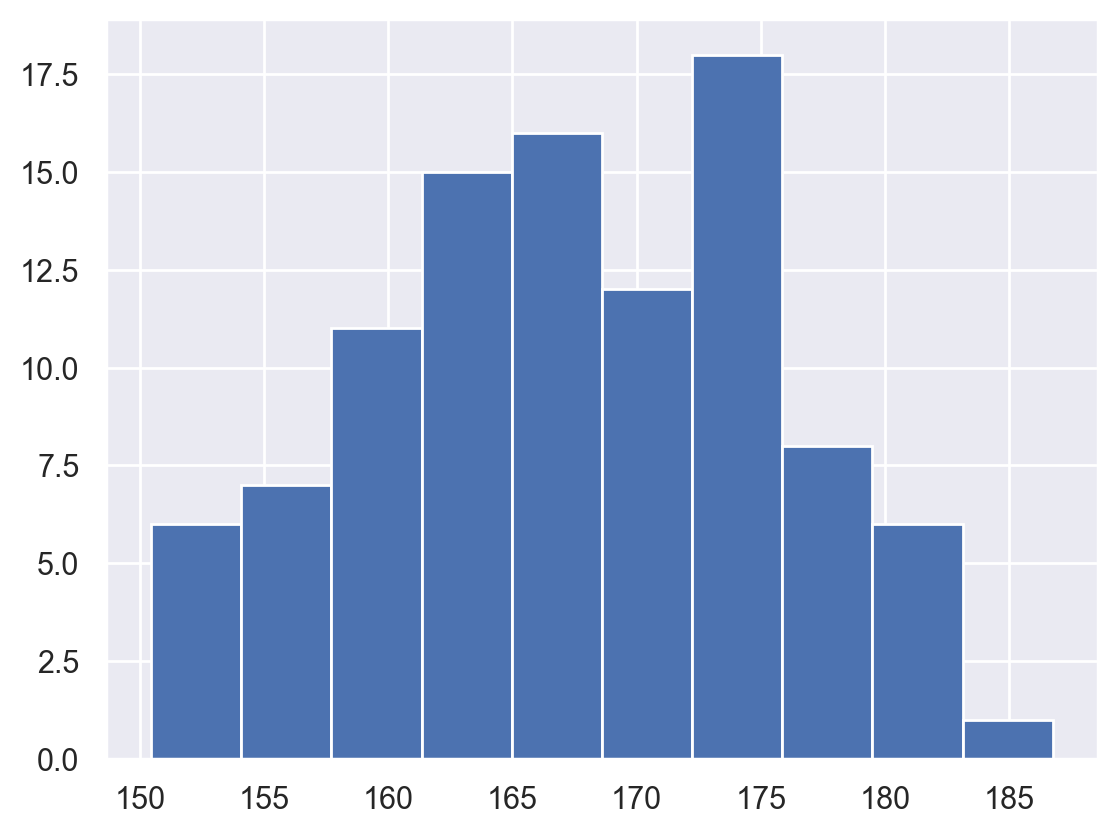

TtestResult(statistic=array([3.2017885]), pvalue=array([0.00183672]), df=array([99]))

In [29]:
from scipy import stats
import matplotlib.pyplot as plt

plt.hist(df)
plt.show()

stats.ttest_1samp(df, 165)

# p-value가 0.0018이므로 유의수준 0.05보다 작으므로 귀무가설 기각, 대립가설 채택

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라. <br>
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [30]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

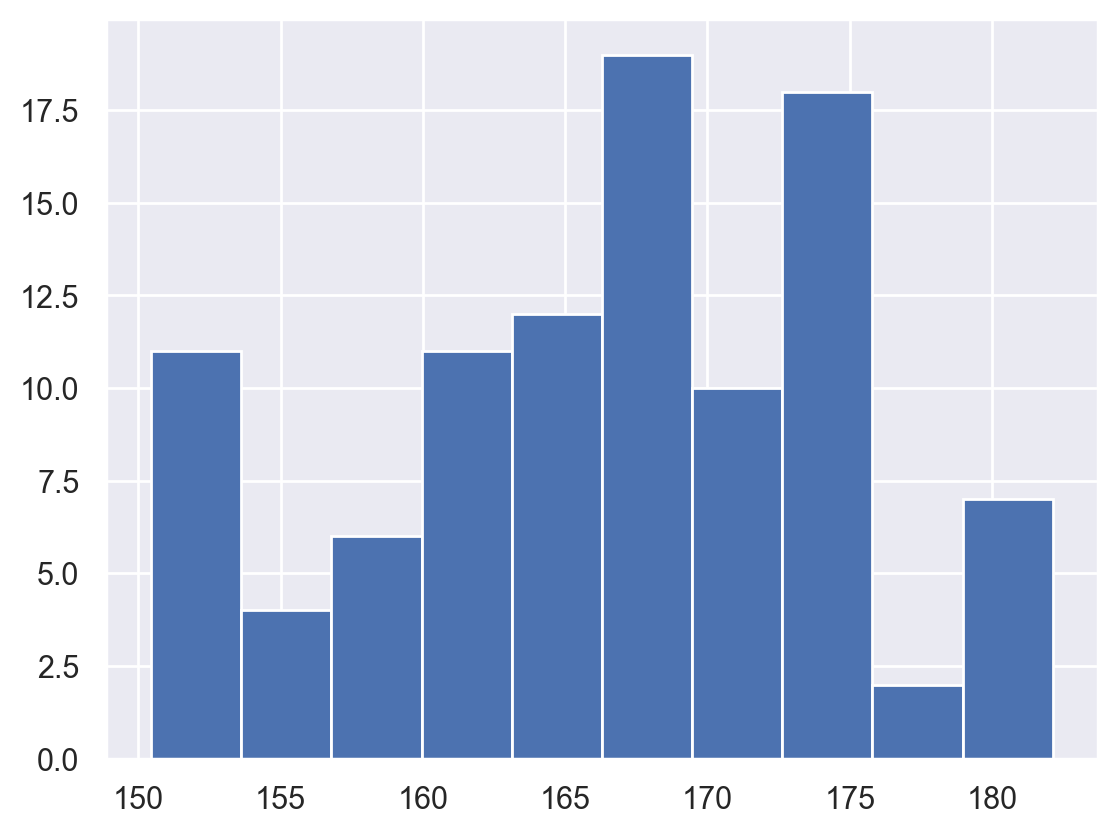

TtestResult(statistic=1.8382852790534039, pvalue=0.06901871284974373, df=99)

In [34]:
import matplotlib.pyplot as plt
from scipy import stats

plt.hist(df)
plt.show()

stats.ttest_1samp(df['height'], 165)

# p-value가 0.06이므로 유의수준 5%(0.05)보다 크기 때문에 귀무가설 기각 X

### 등분산 검정

두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [35]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [39]:
from scipy import stats

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

stats.bartlett(a, b)

# p-value의 값이 0.6이므로 유의수준 5%(0.05)의 값보다 크기 때문에 각 그룹은 등분산이다.

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)

두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [40]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [45]:
from scipy import stats

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(stats.bartlett(a, b))
# p-value가 0.21이므로 유의수준 5% 값보다 크기 때문에 귀무가설 기각 X > 등분산이다.

print(stats.fligner(a, b))
# p-value가 0.025이므로 유의수준 5% 값보다 작기 때문에 귀무가설 기각 > 등분산이 아니다.

print(stats.levene(a, b))
# p-value가 0.038이므로 유의수준 5% 값보다 작기 때문에 귀무가설 기각 > 등분산이 아니다.

BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)
